In [271]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm 
import seaborn as sns

import numpy as np
import pandas as pd



# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
#import graphviz


from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier


In [272]:
# Get the data for model and text 
df_model= pd.read_excel('Dataset_work_17Oct.xlsx', sheet_name='Model')

#print(df_model)

df_test= pd.read_excel('Dataset_work_17Oct.xlsx', sheet_name='test_1_3_16_21')
#print(df_test)

# ['skew_rr', 'mean_acc', 'mean_gra', 'std_gra', 'gender']
# ['std_rr', 'skew_rr', 'mean_rr', 'std_acc', 'mean_acc', 'mean_gra', 'std_gra', 'height', 'gender']

# set the X (as features for model) and y (target data - task information )
X_modelData = pd.DataFrame(df_model,columns=['std_rr', 'skew_rr', 'mean_rr', 'std_acc', 'mean_acc', 'mean_gra', 'std_gra', 'height', 'gender'])
y_model= df_model.task_info
ynew_model= df_model.stationay_yes_no  # 12 is ststionary and 3456 moving. 
y_4group_model=df_model.activity_group_4

X_testData = pd.DataFrame(df_test,columns=['std_rr', 'skew_rr', 'mean_rr', 'std_acc', 'mean_acc', 'mean_gra', 'std_gra', 'height', 'gender'])
y_test= df_test.task_info
ynew_test= df_test.stationay_yes_no
y_4group_test=df_test.activity_group_4
# preprocessing of the all the data is performed 

from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

from sklearn.preprocessing import StandardScaler            # seams standscalar is doing better
std_scaler = StandardScaler()

X_modelData_scaled = std_scaler.fit_transform(X_modelData)                          

X_testData_scaled= std_scaler.fit_transform(X_testData)                          # check the heading of the test data 
 
data_features=columns=['std_rr', 'skew_rr', 'mean_rr', 'std_acc', 'mean_acc', 'mean_gra', 'std_gra', 'height', 'gender']


# Different target labels that can be used as needed to test different conditions 

In [273]:
# Data for modelling 
X=X_modelData_scaled  #
y=y_model
y_4group_model=df_model.activity_group_4

# data for prediction/testing
y_test=y_test
X_test=X_testData_scaled
y_4group_test=df_test.activity_group_4

# Classifiers from 9 features is done 

In [274]:
# Using data without PCA 

Model= X_modelData_scaled
y_model= df_model.task_info
ynew_model= df_model.stationay_yes_no  # 12 is ststionary and 3456 moving. 



test = X_testData_scaled
y_test= df_test.task_info
ynew_test= df_test.stationay_yes_no


# RandomForestClassifier ( Stationary or moving)

In [275]:
# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train=Model
y_train=ynew_model
X_test=test
y_test=ynew_test

print(X_train)
print(y_train)
print(y_test)
print(X_test)




[[ 1.93286906 -0.76595697  1.83605524 ... -0.50995185 -1.25849223
  -1.18597368]
 [ 2.14855678 -0.6410469   1.75632049 ... -0.66114755 -1.25849223
  -1.18597368]
 [ 2.08669801 -0.77433045  1.80338066 ... -0.35147018 -1.25849223
  -1.18597368]
 ...
 [ 0.82666378 -0.69757802  0.87016231 ... -0.22744235  1.86113518
   0.84318903]
 [ 0.83301714 -0.87950547  0.88571281 ... -0.34399689  1.86113518
   0.84318903]
 [ 0.8974452  -0.85185394  0.96279357 ...  0.08615649  1.86113518
   0.84318903]]
0       3456
1       3456
2       3456
3       3456
4       3456
        ... 
1321    3456
1322    3456
1323    3456
1324    3456
1325    3456
Name: stationay_yes_no, Length: 1326, dtype: int64
0      3456
1      3456
2      3456
3      3456
4      3456
       ... 
295    3456
296    3456
297    3456
298    3456
299    3456
Name: stationay_yes_no, Length: 300, dtype: int64
[[ 2.26645706 -1.08987638  2.76804014 ... -0.8417669   1.69726628
   1.00668904]
 [ 2.67206237 -0.75326295  2.86199481 ... -0.840508

Accuracy: 1.0


300

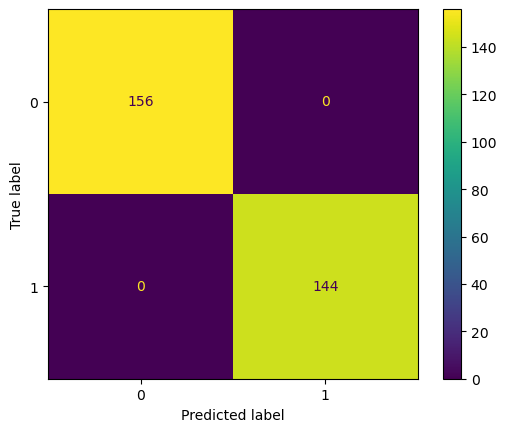

In [276]:
# https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/
# https://www.datacamp.com/tutorial/random-forests-classifier-python

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
rf_2option = RandomForestClassifier()
rf_2option.fit(X_train, y_train)

y_pred = rf_2option.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

len(y_test)

# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

# RandomForestClassifier ( Multiclass with all activities)


In [277]:
Model= X_modelData_scaled
y_model= df_model.task_info




test = X_testData_scaled
y_test= df_test.task_info


X_train=Model
y_train=y_model
X_test=test
y_test=y_test

print(X_train)
print('y_train',y_train)

print(X_test)

print('y_test',y_test)


[[ 1.93286906 -0.76595697  1.83605524 ... -0.50995185 -1.25849223
  -1.18597368]
 [ 2.14855678 -0.6410469   1.75632049 ... -0.66114755 -1.25849223
  -1.18597368]
 [ 2.08669801 -0.77433045  1.80338066 ... -0.35147018 -1.25849223
  -1.18597368]
 ...
 [ 0.82666378 -0.69757802  0.87016231 ... -0.22744235  1.86113518
   0.84318903]
 [ 0.83301714 -0.87950547  0.88571281 ... -0.34399689  1.86113518
   0.84318903]
 [ 0.8974452  -0.85185394  0.96279357 ...  0.08615649  1.86113518
   0.84318903]]
y_train 0       6
1       6
2       6
3       6
4       6
       ..
1321    3
1322    3
1323    3
1324    3
1325    3
Name: task_info, Length: 1326, dtype: int64
[[ 2.26645706 -1.08987638  2.76804014 ... -0.8417669   1.69726628
   1.00668904]
 [ 2.67206237 -0.75326295  2.86199481 ... -0.8405083   1.69726628
   1.00668904]
 [ 2.34665986 -0.93138908  2.7823927  ... -0.84693395  1.69726628
   1.00668904]
 ...
 [ 0.1005931  -0.66812045  0.21214054 ... -0.53669081 -0.99627934
  -0.99335541]
 [ 0.13001408 -0.

In [278]:
# https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/
# https://www.datacamp.com/tutorial/random-forests-classifier-python

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Accuracy: 0.8133333333333334


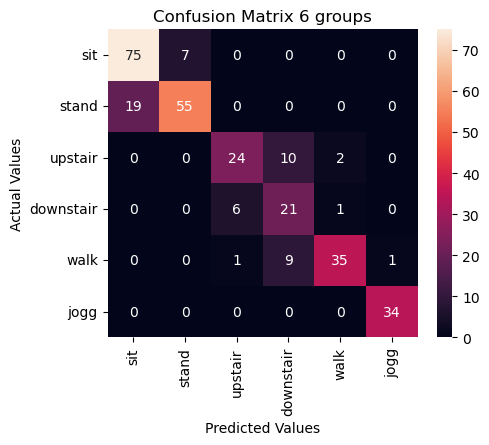

In [279]:
# https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/
    
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm, index = ['sit','stand','upstair','downstair','walk','jogg'], columns = ['sit','stand','upstair','downstair','walk','jogg'])
# 1.sit 2. stand 3. upstair 4. downstair 5. walk 6. Jogg

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)

plt.title('Confusion Matrix 6 groups')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()



In [280]:
print(len(y_test))
print(len(y_pred))

300
300


In [281]:
# Group 4 activity test

In [282]:
Model= X_modelData_scaled
test = X_testData_scaled


y_4group_model=df_model.activity_group_4
y_4group_test=df_test.activity_group_4

# assign values 

X_train=Model
y_train=y_4group_model
X_test=test
y_test=y_4group_test

print(X_train)
print('y_train',y_train)

print(X_test)

print('y_test',y_test)

[[ 1.93286906 -0.76595697  1.83605524 ... -0.50995185 -1.25849223
  -1.18597368]
 [ 2.14855678 -0.6410469   1.75632049 ... -0.66114755 -1.25849223
  -1.18597368]
 [ 2.08669801 -0.77433045  1.80338066 ... -0.35147018 -1.25849223
  -1.18597368]
 ...
 [ 0.82666378 -0.69757802  0.87016231 ... -0.22744235  1.86113518
   0.84318903]
 [ 0.83301714 -0.87950547  0.88571281 ... -0.34399689  1.86113518
   0.84318903]
 [ 0.8974452  -0.85185394  0.96279357 ...  0.08615649  1.86113518
   0.84318903]]
y_train 0        6
1        6
2        6
3        6
4        6
        ..
1321    34
1322    34
1323    34
1324    34
1325    34
Name: activity_group_4, Length: 1326, dtype: int64
[[ 2.26645706 -1.08987638  2.76804014 ... -0.8417669   1.69726628
   1.00668904]
 [ 2.67206237 -0.75326295  2.86199481 ... -0.8405083   1.69726628
   1.00668904]
 [ 2.34665986 -0.93138908  2.7823927  ... -0.84693395  1.69726628
   1.00668904]
 ...
 [ 0.1005931  -0.66812045  0.21214054 ... -0.53669081 -0.99627934
  -0.99335541]

In [283]:
# https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/
# https://www.datacamp.com/tutorial/random-forests-classifier-python

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Accuracy: 0.93


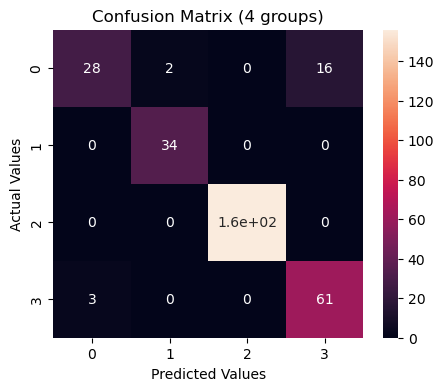

In [284]:
# https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/
    
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index = ['sit & stand','up & down stair','walk','jogg'], columns = ['sit & stand','up & down stair','walk','jogg'])
# 1.2 .sit + stand 3.4 upstair downstair 5. walk 6. Jogg
cm_df = pd.DataFrame(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)

plt.title('Confusion Matrix (4 groups)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()



In [285]:
unique_taskinfo = list(set(y_pred))
print(unique_taskinfo)

[34, 12, 5, 6]


Accuracy: 0.93


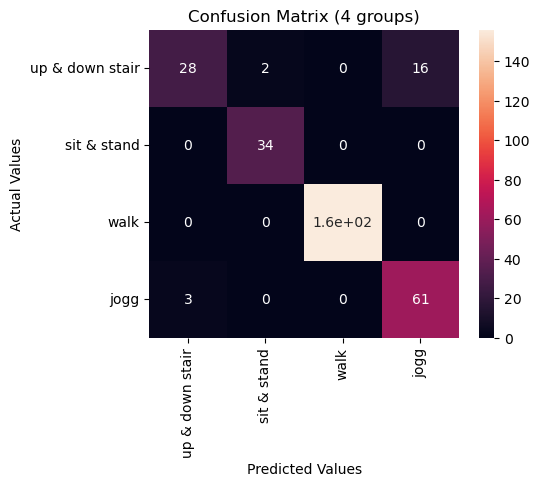

In [290]:
cm_df = pd.DataFrame(cm, index = ['up & down stair','sit & stand','walk','jogg'], columns = ['up & down stair','sit & stand','walk','jogg'])
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix (4 groups)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [287]:
print(len(y_test))
print(len(y_pred))

300
300


In [288]:
1.6e+02


160.0

In [289]:
print(y_test, y_pred)

0       6
1       6
2       6
3       6
4       6
       ..
295    34
296    34
297    34
298    34
299    34
Name: activity_group_4, Length: 300, dtype: int64 [ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6 34 34  5 34 34 34 34  6  6 34 34 34  5  5
  5  5  5  5 34  5  5  5 34  5 34 34 34  5  5  5  5  5  5  5  5 34  5 34
  5  5  5  5  5  5  5  5 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 34 34 34 34
 34 34 34 34 34 34 34  5 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34
 34 34 34 34 34 34 34 34 34 34 34 34 